<a href="https://colab.research.google.com/github/maskot1977/PythonCourse2019/blob/master/semantic_segmentation_for_bears.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from PIL import Image, ImageDraw
from IPython.display import HTML
import random

def koala_or_bear(bear=False, rotate=False, resize=False, gray=True, black=True, others=False):
    r = random.randint(100, 255)
    g = random.randint(100, 255)
    b = random.randint(100, 255)
    if gray:
        r = g = b

    im = Image.new('RGB', (500, 500), (r, g, b))
    draw = ImageDraw.Draw(im)

    if others:
        for i in range(100):
            r = random.randint(100, 255)
            g = random.randint(100, 255)
            b = random.randint(100, 255)
            if gray:
                r = g = b

            x1 = random.randint(0, 500)
            y1 = random.randint(0, 500)
            x2 = random.randint(0, 500)
            y2 = random.randint(0, 500)
            draw.ellipse((x1, x2, y1, y2), fill=(r, g, b))

    r = random.randint(0, 200)
    g = random.randint(0, 200)
    b = random.randint(0, 200)
    if black:
        r = g = b = 1

    dx1 = random.randint(-10, 0)
    dx2 = random.randint(0, 10)
    dy1 = random.randint(-10, 0)
    dy2 = random.randint(0, 10)
    if bear:
        draw.ellipse((200 + dx1, 200 + dy1, 300 + dx2, 300 + dy2), fill=(r, g, b))
    else:
        draw.ellipse((210 + dx1, 210 + dy1, 290 + dx2, 290 + dy2), fill=(r, g, b))

    dx1 = random.randint(-5, 10)
    dx2 = random.randint(-10, 5)
    dy1 = random.randint(-5, 10)
    dy2 = random.randint(-10, 5)
    cx1 = random.randint(160, 180)
    cx2 = random.randint(230, 250)
    if bear:
        #draw.ellipse((160 + dx1, 160 + dy1, 230 + dx2, 230 + dy2), fill=(r, g, b))
        draw.ellipse((160 + dx1, cx1 + dy1, 230 + dx2, cx2 + dy2), fill=(r, g, b))
    else:
        #draw.ellipse((160 + dx1, 190 + dy1, 230 + dx2, 260 + dy2), fill=(r, g, b))
        draw.ellipse((160 + dx1, 210 + dy1, 230 + dx2, 280 + dy2), fill=(r, g, b))
    dx1 = random.randint(-5, 10)
    dx2 = random.randint(-10, 5)
    dy1 = random.randint(-5, 10)
    dy2 = random.randint(-10, 5)
    if bear:
        #draw.ellipse((270 + dx1, 160 + dy1, 340 + dx2, 230 + dy2), fill=(r, g, b))
        draw.ellipse((270 + dx1, cx1 + dy1, 340 + dx2, cx2 + dy2), fill=(r, g, b))
    else:
        #draw.ellipse((270 + dx1, 190 + dy1, 340 + dx2, 260 + dy2), fill=(r, g, b))
        draw.ellipse((270 + dx1, 210 + dy1, 340 + dx2, 280 + dy2), fill=(r, g, b))

    if rotate:
        angle = random.randint(0, 360)
        im = im.rotate(angle)

    if resize:
        h = random.randint(100, 200)
        center = random.randint(220, 280)
        size = 384
        if type(resize) == int:
            size = resize
        im = im.resize(size=(size, size), resample=Image.LANCZOS, box=(max(0, center - h), max(0, center - h), 
                                                                    min(500, center + h), min(500, center + h)))

    return im

In [0]:
from PIL import ImageFilter
import numpy as np
def getdata_for_semantic_segmentation(im):
    x_im = im.filter(ImageFilter.CONTOUR) # 輪郭をとったものを「画像データ」し入力に用いる
    a_im = np.asarray(im) # numpy に変換
    # 真っ黒の部分を白にし、それ以外の色を黒にしたものを「正解データ」とする
    y_im = Image.fromarray(np.where(a_im == 1, 255, 0).astype(dtype='uint8'))
    return x_im, y_im

In [0]:
X_data = [] # 画像データ格納用
Y_data = [] # 正解データ格納用
for i in range(2000): # 画像を２０００個生成する
    # クマの画像を生成
    im = koala_or_bear(bear=True, rotate=True , resize=64, others=True)
    # セマンティック・セグメンテーション用に加工
    x_im, y_im = getdata_for_semantic_segmentation(im)
    X_data.append(x_im) # 画像データ
    Y_data.append(y_im) # 正解データ

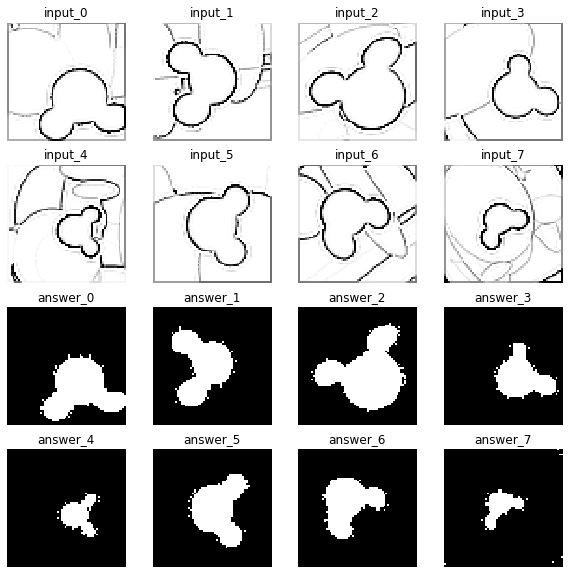

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
for i in range(16):
    ax = fig.add_subplot(4, 4, i+1)
    ax.axis('off')
    if i < 8: # 画像データのトップ８を表示
        ax.set_title('input_{}'.format(i))
        ax.imshow(X_data[i],cmap=plt.cm.gray, interpolation='none')
    else: # 正解データのトップ８を表示
        ax.set_title('answer_{}'.format(i - 8))
        ax.imshow(Y_data[i - 8],cmap=plt.cm.gray, interpolation='none')
plt.show()

In [0]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# 画像データと正解データを ndarray に変換
X_a = np.array([[np.asarray(x).transpose((2, 0, 1))[0]] for x in X_data])
Y_a = np.array([[np.asarray(y).transpose((2, 0, 1))[0]] for y in Y_data])

# ndarray の画像データと正解データを tensor に変換
X_t = torch.tensor(X_a, dtype = torch.float32)               
Y_t = torch.tensor(Y_a, dtype = torch.float32)

# PyTorch で学習するためにデータローダーに格納
data_set = TensorDataset(X_t, Y_t)
data_loader = DataLoader(data_set, batch_size = 100, shuffle = True)

In [0]:
from torch import nn, optim
from torch.nn import functional as F
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # エンコーダー部分
        self.encode1 = nn.Sequential(
            *[
              nn.Conv2d(
                  in_channels = 1, out_channels = 6, kernel_size = 3, padding = 1),
              nn.BatchNorm2d(6)
              ])
        self.encode2 = nn.Sequential(
            *[
              nn.Conv2d(
                  in_channels = 6, out_channels = 16, kernel_size = 3, padding = 1),
              nn.BatchNorm2d(16)
              ])
        self.encode3 = nn.Sequential(
            *[
              nn.Conv2d(
                  in_channels = 16, out_channels = 32, kernel_size = 3, padding = 1),
              nn.BatchNorm2d(32)
              ])

        # デコーダー部分
        self.decode3 = nn.Sequential(
            *[
              nn.ConvTranspose2d(
                  in_channels = 32, out_channels = 16, kernel_size = 3, padding = 1),
              nn.BatchNorm2d(16)
              ])
        self.decode2 = nn.Sequential(
            *[
              nn.ConvTranspose2d(
                  in_channels = 16, out_channels = 6, kernel_size = 3, padding = 1),
              nn.BatchNorm2d(6)
              ])
        self.decode1 = nn.Sequential(
            *[
              nn.ConvTranspose2d(
                  in_channels = 6, out_channels = 1, kernel_size = 3, padding = 1),
              ])

    def forward(self, x):
        # エンコーダー部分
        dim_0 = x.size() # デコーダー第１層でサイズを元に戻すとき用             
        x = F.relu(self.encode1(x))
        # return_indices = True にして、デコーダーで max_pool の位置idxを用いる
        x, idx_1 = F.max_pool2d(x, kernel_size = 2, stride = 2, return_indices = True)
        dim_1 = x.size() # デコーダー第２層でサイズを元に戻すとき用
        x = F.relu(self.encode2(x))
        # return_indices = True にして、デコーダーで max_pool の位置idxを用いる                       
        x, idx_2 = F.max_pool2d(x, kernel_size = 2, stride = 2, return_indices = True)            
        dim_2 = x.size()
        x = F.relu(self.encode3(x)) # デコーダー第３層でサイズを元に戻すとき用
        # return_indices = True にして、デコーダーで max_pool の位置idxを用いる
        x, idx_3 = F.max_pool2d(x, kernel_size = 2, stride = 2, return_indices = True)

        # デコーダー部分
        x = F.max_unpool2d(x, idx_3, kernel_size = 2, stride = 2, output_size = dim_2)
        x = F.relu(self.decode3(x))
        x = F.max_unpool2d(x, idx_2, kernel_size = 2, stride = 2, output_size = dim_1)           
        x = F.relu(self.decode2(x))                           
        x = F.max_unpool2d(x, idx_1, kernel_size = 2, stride = 2, output_size = dim_0)           
        x = F.relu(self.decode1(x))                           
        x = torch.sigmoid(x)                                     

        return x

epoch: 0  loss: 8388.166772460938
epoch: 2  loss: 8372.164868164062
epoch: 3  loss: 8372.035913085938
epoch: 4  loss: 8371.988427734375
epoch: 5  loss: 8371.956298828125
epoch: 6  loss: 8371.9318359375
epoch: 7  loss: 8371.910205078126
epoch: 8  loss: 8371.892700195312
epoch: 9  loss: 8371.883227539063
epoch: 10  loss: 8371.862719726563
epoch: 11  loss: 8371.852978515624
epoch: 12  loss: 8371.846630859374
epoch: 13  loss: 8371.83623046875
epoch: 14  loss: 8371.83212890625
epoch: 15  loss: 8371.82744140625
epoch: 16  loss: 8371.823120117188
epoch: 17  loss: 8371.817065429688
epoch: 18  loss: 8371.812841796875
epoch: 19  loss: 8371.810180664062
epoch: 20  loss: 8371.808081054687
epoch: 21  loss: 8371.805493164062
epoch: 22  loss: 8371.804248046876
epoch: 23  loss: 8371.80361328125
epoch: 24  loss: 8371.800415039062
epoch: 25  loss: 8371.79765625
epoch: 26  loss: 8371.7970703125
epoch: 27  loss: 8371.800219726563
epoch: 28  loss: 8371.7958984375
epoch: 29  loss: 8371.7935546875
epoch: 30 

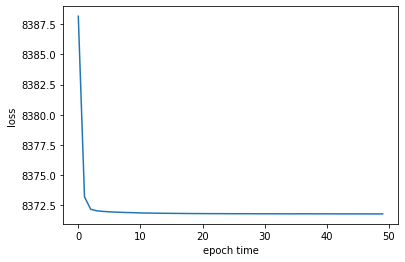

CPU times: user 6min 7s, sys: 8.1 s, total: 6min 16s
Wall time: 6min 16s


In [7]:
%%time

net = Net()
loss_fn = nn.MSELoss()                               
optimizer = optim.Adam(net.parameters(), lr = 0.01)

total_loss_history = []                                     
epoch_time = 50
for epoch in range(epoch_time):
    total_loss = 0.0                          
    net.train()
    for i, (XX, yy) in enumerate(data_loader):
        optimizer.zero_grad()       
        y_pred = net(XX)
        loss = loss_fn(y_pred, yy)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print("epoch:",epoch, " loss:", total_loss/(i + 1))
    total_loss_history.append(total_loss/(i + 1))

#lossの可視化
plt.plot(total_loss_history)
plt.ylabel("loss")
plt.xlabel("epoch time")
plt.savefig("total_loss_history")
plt.show()

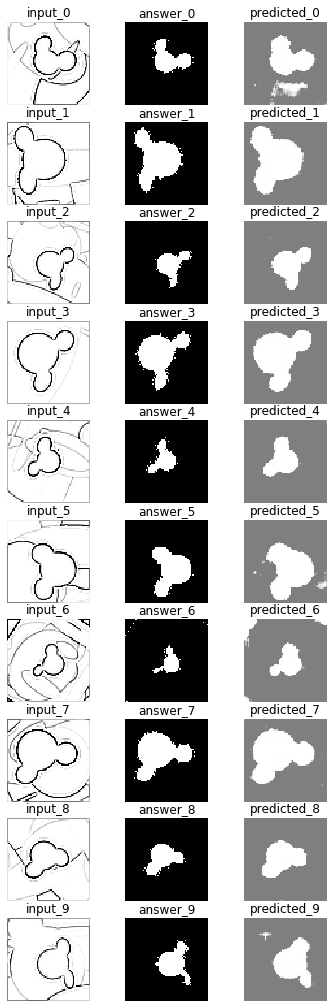

In [13]:
X_test = [] # テスト用の画像データを格納
Y_test = [] # テスト用の正解データを格納
Z_test = [] # テスト用の予測結果を格納

for i in range(100): # 学習に用いなかった新規データを１００個生成
    im = koala_or_bear(bear=True, rotate=True, resize=64, others=True)
    x_im, y_im = getdata_for_semantic_segmentation(im)
    X_test.append(x_im)
    Y_test.append(y_im)

# テスト用の画像データをPyTorch用に整形
X_test_a = np.array([[np.asarray(x).transpose((2, 0, 1))[0]] for x in X_test])
X_test_t = torch.tensor(X_test_a, dtype = torch.float32)

# 学習済みのモデルを使って予測値を計算
Y_pred = net(X_test_t)

# 予測値を ndarray として格納（後でプロットに使う）
for pred in Y_pred:
    Z_test.append(pred.detach().numpy())

# データの先頭１０個に対して、画像データ、正解データ、予測値を描画
fig = plt.figure(figsize=(6,18))
for i in range(10):
    ax = fig.add_subplot(10, 3, (i * 3)+1)
    ax.axis('off')
    ax.set_title('input_{}'.format(i))
    ax.imshow(X_test[i])
    ax = fig.add_subplot(10, 3, (i * 3)+2)
    ax.axis('off')
    ax.set_title('answer_{}'.format(i))
    ax.imshow(Y_test[i])
    ax = fig.add_subplot(10, 3, (i * 3)+3)
    ax.axis('off')
    ax.set_title('predicted_{}'.format(i))
    yp2 = Y_pred[i].detach().numpy()[0] * 255
    z_im = Image.fromarray(np.array([yp2, yp2, yp2]).transpose((1, 2, 0)).astype(dtype='uint8'))
    ax.imshow(z_im)
plt.show()

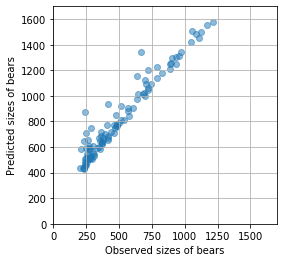

In [17]:
A_ans = []
A_pred = []
for yt, zt in zip(Y_test, Z_test):
    # 正解の白の面積（ベクトルが３色分あるので３で割る）
    A_ans.append(np.where(np.asarray(yt) > 0.5, 1, 0).sum() / 3) 
    A_pred.append(np.where(np.asarray(zt) > 0.5, 1, 0).sum()) # 予測値の白の面積

plt.figure(figsize=(4, 4))
plt.scatter(A_ans, A_pred, alpha=0.5)
plt.grid()
plt.xlabel('Observed sizes of bears')
plt.ylabel('Predicted sizes of bears')
plt.xlim([0, 1700])
plt.ylim([0, 1700])
plt.show()